# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name=r"E:\Udacity\DeepReinforcementLearning\deep-reinforcement-learning-master\deep-reinforcement-learning-master\p3_collab-compet\Tennis_Windows_x86_64\Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [8]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    states = np.reshape(states, (1,48))
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)

        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         for i,j in enumerate(states):
#             print("I : ",i ,"J : ",j)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

[[ 1.81993909 -0.20160764]
 [-0.26577542 -1.28594253]]
[[-1.57068143  1.04163881]
 [-1.10115292  0.37502531]]
[[-1.01139357  1.13311542]
 [-1.79291507 -0.07003126]]
[[-0.69884887 -0.51799523]
 [ 0.21210799  1.14228654]]
[[ 1.82996968 -0.08738322]
 [-0.14139736  0.19676721]]
[[-0.03694852  0.94821652]
 [ 0.18879104  0.54070337]]
[[-0.800403   -0.17278433]
 [ 0.21288118 -0.28398364]]
[[ 1.85179266 -0.97654999]
 [ 0.23305611  2.10573939]]
[[ 0.5100413  -2.75392087]
 [-0.82284335  1.52696567]]
[[-0.33982956 -1.38657975]
 [-0.37483133  1.45449516]]
[[-0.01733704 -0.31829845]
 [-1.13737604  2.45785174]]
[[-0.06386278  1.67438653]
 [-1.1368854  -0.52418568]]
[[ 0.49871759  1.5766439 ]
 [-0.91001413 -1.07014974]]
[[ 1.08961224  0.60912132]
 [-0.44935171  0.49318443]]
[[0.49852296 0.29838426]
 [0.88274291 1.34954006]]
[[-0.28762908  0.96750738]
 [-1.67772929  1.24367241]]
[[ 2.50391762 -1.49029621]
 [ 0.69981739  0.91856981]]
[[ 2.7280793   0.94724884]
 [-0.57677483 -0.88443438]]
[[2.53432917 0

### 4. Train the agent

In the next code cell, we initialize the agent and train the agent with data we recieve from the the individual agents in the environment. Here we will gradually improve the performance of our agent to choose better actions when interacting with the environment.

Once we have a received an average score of 0.5+ over the last 100 episodes, we break from the training algorithm

Episode 10	Average Score: 0.0000
Episode 20	Average Score: 0.0000
Episode 30	Average Score: 0.0000
Episode 40	Average Score: 0.0048
Episode 50	Average Score: 0.0038
Episode 60	Average Score: 0.0048
Episode 70	Average Score: 0.0041
Episode 80	Average Score: 0.0049
Episode 90	Average Score: 0.0043
Episode 100	Average Score: 0.0049
Episode 110	Average Score: 0.0049
Episode 120	Average Score: 0.0059
Episode 130	Average Score: 0.0059
Episode 140	Average Score: 0.0090
Episode 150	Average Score: 0.0110
Episode 160	Average Score: 0.0120
Episode 170	Average Score: 0.0159
Episode 180	Average Score: 0.0159
Episode 190	Average Score: 0.0189
Episode 200	Average Score: 0.0199
Episode 210	Average Score: 0.0219
Episode 220	Average Score: 0.0239
Episode 230	Average Score: 0.0269
Episode 240	Average Score: 0.0268
Episode 250	Average Score: 0.0316
Episode 260	Average Score: 0.0376
Episode 270	Average Score: 0.0417
Episode 280	Average Score: 0.0496
Episode 290	Average Score: 0.0516
Episode 300	Average Sco

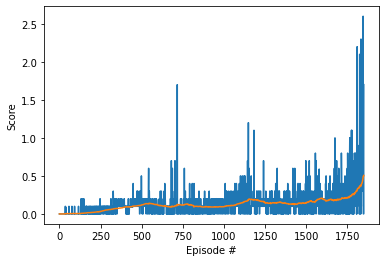

In [5]:
from ddpg_agent import Agent
import matplotlib.pyplot as plt
from collections import deque
import torch
import random


agent1 = Agent(state_size*2, action_size, 1, random_seed=0)
agent2 = Agent(state_size*2, action_size, 2, random_seed=0)

def marl(n_episodes=2000, max_t=10000, print_every=10):
    scores_deque = deque(maxlen=100)
    scores_n = []
    avg_score_n = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent1.reset()
        agent2.reset()
        scores = np.zeros(2)
        
        for t in range(max_t):
            action_1 = agent1.act(states, True)
            action_2 = agent2.act(states, True)
            actions = np.concatenate((action_1,action_2),axis=0)

            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            
            agent2.step(states, actions, rewards,  next_states, dones,t)
            agent1.step(states, actions, rewards,  next_states, dones,t)

            states = next_states 
            scores = scores + rewards                        # update the score (for each agent)

            if np.any(dones):
                break 
                
        scores_deque.append(np.max(scores))
        scores_n.append(np.max(scores))
        avg_score_n.append(np.mean(scores_deque))
        print('\rEpisode {}\Max Score: {:.3f}'.format(i_episode, np.max(scores)), end="")
        
        if(np.mean(scores_deque) > 0.5):
            print('\rEpisode {}\tAverage Score: {:.4f}'.format(i_episode, np.mean(scores_deque)))
            print("Goal reached in ", i_episode, " episodes")
            torch.save(agent1.actor_local.state_dict(), 'checkpoint_actor1.pth')
            torch.save(agent1.critic_local.state_dict(), 'checkpoint_critic1.pth')
            torch.save(agent2.actor_local.state_dict(), 'checkpoint_actor2.pth')
            torch.save(agent2.critic_local.state_dict(), 'checkpoint_critic2.pth')
            break
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.4f}'.format(i_episode, np.mean(scores_deque)))
            
    return [scores_n,avg_score_n]

scores = marl()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores[0])), scores[0])
plt.plot(np.arange(len(scores[1])), scores[1])
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Take Actions based on trained model

In the next code cell, we will visualize the performance of our algorithm after we have completed the training.

In [7]:
agent1 = Agent(state_size*2, action_size,1, random_seed=0)
# checkpoint = torch.load('checkpoint_actor.pth')
agent1.actor_local.load_state_dict(torch.load('checkpoint_actor1.pth'))
agent1.critic_local.load_state_dict(torch.load('checkpoint_critic1.pth')) 
agent1.actor_local.eval()
agent1.critic_local.eval()

agent2 = Agent(state_size*2, action_size,2, random_seed=0)
# checkpoint = torch.load('checkpoint_actor.pth')
agent2.actor_local.load_state_dict(torch.load('checkpoint_actor2.pth'))
agent2.critic_local.load_state_dict(torch.load('checkpoint_critic2.pth')) 
agent2.actor_local.eval()
agent2.critic_local.eval()

for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        action_1 = agent1.act(states, False)
        action_2 = agent2.act(states, False)
        actions = np.concatenate((action_1,action_2),axis=0)

        # all actions between -1 and 1
#         for i,j in enumerate(states):
#             print("I : ",i ,"J : ",j)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.800000011920929
Score (max over agents) from episode 4: 0.30000000447034836
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

In [ ]:
env.close()